- scarpe totali a catalogo
- uomo vs donna
- tipologia
- colori
- fasce di prezzo
    - tipologia
    - uomo vs donna
    - tomaia
- marginalità media per tipologia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importo i due file csv df_velasca e df_kammi
df_velasca = pd.read_csv('df_velasca.csv')
df_kammi = pd.read_csv('df_kammi.csv')

In [3]:
# controllo i due df
df_velasca

,Nome,Tipologia,Stagione,Colore,Tomaia,Suola,Prezzo,Sesso
0,Giacalustra,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo
1,Caffettee,Francesine,Autunno / Inverno,Nero,Pelle liscia,Gomma Vibram,224.0,Uomo
2,Brumista,Francesine,Autunno / Inverno,Testa di moro,Pelle liscia,Gomma Vibram,224.0,Uomo
3,Feracaval,Francesine,Autunno / Inverno,Testa di moro,Pelle scamosciata,Gomma Vibram,224.0,Uomo
4,Cavadent,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo
...,...,...,...,...,...,...,...,...
262,Paladin,Sandali con tacco,Primavera / Estate,Nero,Pelle liscia,Cuoio,280.0,Donna
263,Belè,Sabot con treccia,Primavera / Estate,Nero,Pelle liscia,Gomma,144.0,Donna
264,Campanatt,Sabot con fibbia,Primavera / Estate,Marrone,Pelle scamosciata,Gomma,144.0,Donna
265,Tenga,Penny Loafers Sabot,Primavera / Estate,Nero,Pelle liscia,Cuoio,165.0,Donna


In [4]:
df_kammi

,Modello,Prezzo_Originale,Prezzo_Scontato,Descrizione,Tacco (cm),Materiale_esterno,Materiale_interno,Materiale_suola,Tipologia,Sesso,Colore
0,Sandalo con il tacco 7537,69.9,48.93,Sandalo con tacco 7 cm in laminato oro rosa co...,7.0,Sintetico,Sintetico,Sintetico,Sandali con tacco,Donna,Oro
1,Sandalo 931,59.9,41.93,"Sandalo con tacco 4,5 cm in pelle bianca arric...",4.5,Pelle,Pelle,Gomma,Sandali con tacco,Donna,Bianco
2,Sandalo con tacco L153,99.9,69.93,"Sandalo con tacco 6 cm, largo, in pelle color ...",6.0,Pelle,Pelle,Cuoio,Sandali con tacco,Donna,Cipria
3,Sandalo con tacco 7511,65.0,45.50,"Sandalo con tacco 6 cm, largo, in soft nude co...",6.0,Sintetico,Pelle,Sintetico,Sandali con tacco,Donna,Oro
4,Sandalo Celine,55.0,38.50,"Sandalo con tacco 8,5 cm, in lurex color champ...",8.5,Tessuto,Sintetico,Sintetico,Sandali con tacco,Donna,Champagne
...,...,...,...,...,...,...,...,...,...,...,...
200,Mocassino Barca,59.9,47.92,Mocassino in pelle ingrassata navy,0.0,Pelle,Pelle,Gomma,Mocassini,Uomo,Navy
201,Mocassino 012,59.9,47.92,Moccassino in pelle testa di moro,0.0,Pelle,Pelle,Sintetico,Mocassini,Uomo,Oro
202,Allacciata Barca,59.9,47.92,Allacciata in pelle ingrassata blu,0.0,Pelle,Pelle,Gomma,Allacciate,Uomo,Blu
203,Mocassino Barca,59.9,47.92,Mocassino in pelle ingrassata testa di moro,0.0,Pelle,Pelle,Gomma,Mocassini,Uomo,Oro


In [5]:
# rinomino le colonne del df_kammi: Modello -> Nome, Prezzo_Originale -> Prezzo, Materiale_esterno -> Tomaia, Materiale_suola -> Suola
df_kammi = df_kammi.rename(columns={'Modello': 'Nome', 'Prezzo_Originale': 'Prezzo', 'Materiale_esterno': 'Tomaia', 'Materiale_suola': 'Suola'})

# aggiungo la colonna stagione al df_kammi e la valorizzo con 'Estate'
df_kammi['Stagione'] = 'Estate'

# riordino le colonne del df_kammi: Nome, Tipologia, Stagione, Colore, Tomaia, Suola, Prezzo, Prezzo_Scontato, Sesso, Materiale_interno, Tacco (cm), Descrizione
df_kammi = df_kammi[['Nome', 'Tipologia', 'Stagione', 'Colore', 'Tomaia', 'Suola', 'Prezzo', 'Prezzo_Scontato', 'Sesso', 'Materiale_interno', 'Tacco (cm)', 'Descrizione']]

df_kammi

,Nome,Tipologia,Stagione,Colore,Tomaia,Suola,Prezzo,Prezzo_Scontato,Sesso,Materiale_interno,Tacco (cm),Descrizione
0,Sandalo con il tacco 7537,Sandali con tacco,Estate,Oro,Sintetico,Sintetico,69.9,48.93,Donna,Sintetico,7.0,Sandalo con tacco 7 cm in laminato oro rosa co...
1,Sandalo 931,Sandali con tacco,Estate,Bianco,Pelle,Gomma,59.9,41.93,Donna,Pelle,4.5,"Sandalo con tacco 4,5 cm in pelle bianca arric..."
2,Sandalo con tacco L153,Sandali con tacco,Estate,Cipria,Pelle,Cuoio,99.9,69.93,Donna,Pelle,6.0,"Sandalo con tacco 6 cm, largo, in pelle color ..."
3,Sandalo con tacco 7511,Sandali con tacco,Estate,Oro,Sintetico,Sintetico,65.0,45.50,Donna,Pelle,6.0,"Sandalo con tacco 6 cm, largo, in soft nude co..."
4,Sandalo Celine,Sandali con tacco,Estate,Champagne,Tessuto,Sintetico,55.0,38.50,Donna,Sintetico,8.5,"Sandalo con tacco 8,5 cm, in lurex color champ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
200,Mocassino Barca,Mocassini,Estate,Navy,Pelle,Gomma,59.9,47.92,Uomo,Pelle,0.0,Mocassino in pelle ingrassata navy
201,Mocassino 012,Mocassini,Estate,Oro,Pelle,Sintetico,59.9,47.92,Uomo,Pelle,0.0,Moccassino in pelle testa di moro
202,Allacciata Barca,Allacciate,Estate,Blu,Pelle,Gomma,59.9,47.92,Uomo,Pelle,0.0,Allacciata in pelle ingrassata blu
203,Mocassino Barca,Mocassini,Estate,Oro,Pelle,Gomma,59.9,47.92,Uomo,Pelle,0.0,Mocassino in pelle ingrassata testa di moro


In [6]:
# rinomino colonna 'Tipologia' in 'Sottotipo' nel df_kammi
df_kammi = df_kammi.rename(columns={'Tipologia': 'Sottotipo'})

# creo la colonna 'Tipologia' con i valori presi dalla colonna 'Sottotipo' nel df_kammi escludendo il testo dopo il primo spazio
df_kammi['Tipologia'] = df_kammi['Sottotipo'].str.split(' ').str[0]

df_kammi

,Nome,Sottotipo,Stagione,Colore,Tomaia,Suola,Prezzo,Prezzo_Scontato,Sesso,Materiale_interno,Tacco (cm),Descrizione,Tipologia
0,Sandalo con il tacco 7537,Sandali con tacco,Estate,Oro,Sintetico,Sintetico,69.9,48.93,Donna,Sintetico,7.0,Sandalo con tacco 7 cm in laminato oro rosa co...,Sandali
1,Sandalo 931,Sandali con tacco,Estate,Bianco,Pelle,Gomma,59.9,41.93,Donna,Pelle,4.5,"Sandalo con tacco 4,5 cm in pelle bianca arric...",Sandali
2,Sandalo con tacco L153,Sandali con tacco,Estate,Cipria,Pelle,Cuoio,99.9,69.93,Donna,Pelle,6.0,"Sandalo con tacco 6 cm, largo, in pelle color ...",Sandali
3,Sandalo con tacco 7511,Sandali con tacco,Estate,Oro,Sintetico,Sintetico,65.0,45.50,Donna,Pelle,6.0,"Sandalo con tacco 6 cm, largo, in soft nude co...",Sandali
4,Sandalo Celine,Sandali con tacco,Estate,Champagne,Tessuto,Sintetico,55.0,38.50,Donna,Sintetico,8.5,"Sandalo con tacco 8,5 cm, in lurex color champ...",Sandali
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Mocassino Barca,Mocassini,Estate,Navy,Pelle,Gomma,59.9,47.92,Uomo,Pelle,0.0,Mocassino in pelle ingrassata navy,Mocassini
201,Mocassino 012,Mocassini,Estate,Oro,Pelle,Sintetico,59.9,47.92,Uomo,Pelle,0.0,Moccassino in pelle testa di moro,Mocassini
202,Allacciata Barca,Allacciate,Estate,Blu,Pelle,Gomma,59.9,47.92,Uomo,Pelle,0.0,Allacciata in pelle ingrassata blu,Allacciate
203,Mocassino Barca,Mocassini,Estate,Oro,Pelle,Gomma,59.9,47.92,Uomo,Pelle,0.0,Mocassino in pelle ingrassata testa di moro,Mocassini


In [7]:
df_kammi_copy = df_kammi.copy()

# creo una nuova colonna 'Margine' nel df_velasca_copy e la valorizzo con il margine di profitto (prezzo*0.29)
df_kammi_copy['Margine'] = df_kammi_copy['Prezzo'] * 0.29

df_kammi_copy

,Nome,Sottotipo,Stagione,Colore,Tomaia,Suola,Prezzo,Prezzo_Scontato,Sesso,Materiale_interno,Tacco (cm),Descrizione,Tipologia,Margine
0,Sandalo con il tacco 7537,Sandali con tacco,Estate,Oro,Sintetico,Sintetico,69.9,48.93,Donna,Sintetico,7.0,Sandalo con tacco 7 cm in laminato oro rosa co...,Sandali,20.271
1,Sandalo 931,Sandali con tacco,Estate,Bianco,Pelle,Gomma,59.9,41.93,Donna,Pelle,4.5,"Sandalo con tacco 4,5 cm in pelle bianca arric...",Sandali,17.371
2,Sandalo con tacco L153,Sandali con tacco,Estate,Cipria,Pelle,Cuoio,99.9,69.93,Donna,Pelle,6.0,"Sandalo con tacco 6 cm, largo, in pelle color ...",Sandali,28.971
3,Sandalo con tacco 7511,Sandali con tacco,Estate,Oro,Sintetico,Sintetico,65.0,45.50,Donna,Pelle,6.0,"Sandalo con tacco 6 cm, largo, in soft nude co...",Sandali,18.850
4,Sandalo Celine,Sandali con tacco,Estate,Champagne,Tessuto,Sintetico,55.0,38.50,Donna,Sintetico,8.5,"Sandalo con tacco 8,5 cm, in lurex color champ...",Sandali,15.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Mocassino Barca,Mocassini,Estate,Navy,Pelle,Gomma,59.9,47.92,Uomo,Pelle,0.0,Mocassino in pelle ingrassata navy,Mocassini,17.371
201,Mocassino 012,Mocassini,Estate,Oro,Pelle,Sintetico,59.9,47.92,Uomo,Pelle,0.0,Moccassino in pelle testa di moro,Mocassini,17.371
202,Allacciata Barca,Allacciate,Estate,Blu,Pelle,Gomma,59.9,47.92,Uomo,Pelle,0.0,Allacciata in pelle ingrassata blu,Allacciate,17.371
203,Mocassino Barca,Mocassini,Estate,Oro,Pelle,Gomma,59.9,47.92,Uomo,Pelle,0.0,Mocassino in pelle ingrassata testa di moro,Mocassini,17.371


In [8]:
df_kammi['Tipologia'].value_counts()

Tipologia
Scarpe        100
Sandali        39
Sneakers       23
Zeppe          16
Allacciate      8
Mocassini       8
Stivaletti      5
Derby           3
Ciabatte        2
Stivali         1
Name: count, dtype: int64

In [9]:
# rinomino colonna 'Tipologia' in 'Sottotipo' nel df_velasca
df_velasca = df_velasca.rename(columns={'Tipologia': 'Sottotipo'})

# creo la colonna 'Tipologia' con i valori presi dalla colonna 'Sottotipo' nel df_velasca escludendo il testo dopo il primo spazio
df_velasca['Tipologia'] = df_velasca['Sottotipo'].str.split(' ').str[0]

df_velasca

,Nome,Sottotipo,Stagione,Colore,Tomaia,Suola,Prezzo,Sesso,Tipologia
0,Giacalustra,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine
1,Caffettee,Francesine,Autunno / Inverno,Nero,Pelle liscia,Gomma Vibram,224.0,Uomo,Francesine
2,Brumista,Francesine,Autunno / Inverno,Testa di moro,Pelle liscia,Gomma Vibram,224.0,Uomo,Francesine
3,Feracaval,Francesine,Autunno / Inverno,Testa di moro,Pelle scamosciata,Gomma Vibram,224.0,Uomo,Francesine
4,Cavadent,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine
...,...,...,...,...,...,...,...,...,...
262,Paladin,Sandali con tacco,Primavera / Estate,Nero,Pelle liscia,Cuoio,280.0,Donna,Sandali
263,Belè,Sabot con treccia,Primavera / Estate,Nero,Pelle liscia,Gomma,144.0,Donna,Sabot
264,Campanatt,Sabot con fibbia,Primavera / Estate,Marrone,Pelle scamosciata,Gomma,144.0,Donna,Sabot
265,Tenga,Penny Loafers Sabot,Primavera / Estate,Nero,Pelle liscia,Cuoio,165.0,Donna,Penny


In [10]:
# dal df_velasca filtro solo le stagioni '4 Stagioni' e 'Primavera / Estate'
df_velasca = df_velasca[df_velasca['Stagione'].isin(['4 Stagioni', 'Primavera / Estate'])]

df_velasca

,Nome,Sottotipo,Stagione,Colore,Tomaia,Suola,Prezzo,Sesso,Tipologia
0,Giacalustra,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine
4,Cavadent,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine
5,Trombee,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine
6,Lattee,Francesine,4 Stagioni,Nero,Pelle liscia,Gomma & cuoio FA x V.,380.0,Uomo,Francesine
7,Medich,Francesine,4 Stagioni,Marrone,Pelle liscia,Cuoio,177.0,Uomo,Francesine
...,...,...,...,...,...,...,...,...,...
262,Paladin,Sandali con tacco,Primavera / Estate,Nero,Pelle liscia,Cuoio,280.0,Donna,Sandali
263,Belè,Sabot con treccia,Primavera / Estate,Nero,Pelle liscia,Gomma,144.0,Donna,Sabot
264,Campanatt,Sabot con fibbia,Primavera / Estate,Marrone,Pelle scamosciata,Gomma,144.0,Donna,Sabot
265,Tenga,Penny Loafers Sabot,Primavera / Estate,Nero,Pelle liscia,Cuoio,165.0,Donna,Penny


In [11]:
df_velasca_copy = df_velasca.copy()

# creo una nuova colonna 'Margine' nel df_velasca_copy e la valorizzo con il margine di profitto (prezzo*0.24)
df_velasca_copy['Margine'] = df_velasca_copy['Prezzo'] * 0.24

df_velasca_copy

,Nome,Sottotipo,Stagione,Colore,Tomaia,Suola,Prezzo,Sesso,Tipologia,Margine
0,Giacalustra,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine,70.80
4,Cavadent,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine,70.80
5,Trombee,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine,70.80
6,Lattee,Francesine,4 Stagioni,Nero,Pelle liscia,Gomma & cuoio FA x V.,380.0,Uomo,Francesine,91.20
7,Medich,Francesine,4 Stagioni,Marrone,Pelle liscia,Cuoio,177.0,Uomo,Francesine,42.48
...,...,...,...,...,...,...,...,...,...,...
262,Paladin,Sandali con tacco,Primavera / Estate,Nero,Pelle liscia,Cuoio,280.0,Donna,Sandali,67.20
263,Belè,Sabot con treccia,Primavera / Estate,Nero,Pelle liscia,Gomma,144.0,Donna,Sabot,34.56
264,Campanatt,Sabot con fibbia,Primavera / Estate,Marrone,Pelle scamosciata,Gomma,144.0,Donna,Sabot,34.56
265,Tenga,Penny Loafers Sabot,Primavera / Estate,Nero,Pelle liscia,Cuoio,165.0,Donna,Penny,39.60


In [12]:
# conto le occorrenze di ogni 'Tipologia'
tipologia_counts = df_velasca_copy['Tipologia'].value_counts()

# filtro le tipologie con meno di 5 elementi
tipologie_da_sostituire = tipologia_counts[tipologia_counts < 5].index

# sostituisco le tipologie con meno di 5 elementi con 'Altro'
df_velasca_copy.loc[df_velasca_copy['Tipologia'].isin(tipologie_da_sostituire), 'Tipologia'] = 'Altro'

# visualizzo il risultato
df_velasca_copy


,Nome,Sottotipo,Stagione,Colore,Tomaia,Suola,Prezzo,Sesso,Tipologia,Margine
0,Giacalustra,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine,70.80
4,Cavadent,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine,70.80
5,Trombee,Francesine,4 Stagioni,Nero,Pelle liscia,Cuoio,295.0,Uomo,Francesine,70.80
6,Lattee,Francesine,4 Stagioni,Nero,Pelle liscia,Gomma & cuoio FA x V.,380.0,Uomo,Francesine,91.20
7,Medich,Francesine,4 Stagioni,Marrone,Pelle liscia,Cuoio,177.0,Uomo,Francesine,42.48
...,...,...,...,...,...,...,...,...,...,...
262,Paladin,Sandali con tacco,Primavera / Estate,Nero,Pelle liscia,Cuoio,280.0,Donna,Sandali,67.20
263,Belè,Sabot con treccia,Primavera / Estate,Nero,Pelle liscia,Gomma,144.0,Donna,Altro,34.56
264,Campanatt,Sabot con fibbia,Primavera / Estate,Marrone,Pelle scamosciata,Gomma,144.0,Donna,Altro,34.56
265,Tenga,Penny Loafers Sabot,Primavera / Estate,Nero,Pelle liscia,Cuoio,165.0,Donna,Penny,39.60


In [13]:
df_velasca_copy['Tipologia'].value_counts()

Tipologia
Altro          24
Sandali        17
Penny          16
Stivaletti     15
Sneakers       14
Tassel         10
Francesine      9
College         8
Gommini         8
Friulane        7
Derbies         6
Espadrillas     6
Casual          5
Scarpe          5
Name: count, dtype: int64

# CREAZIONE GRAFICI

## Grafico numero totale modelli

La ditta Kammi ha a listino un totale di 205 modelli estivi, mentre Velasca ne ha 150


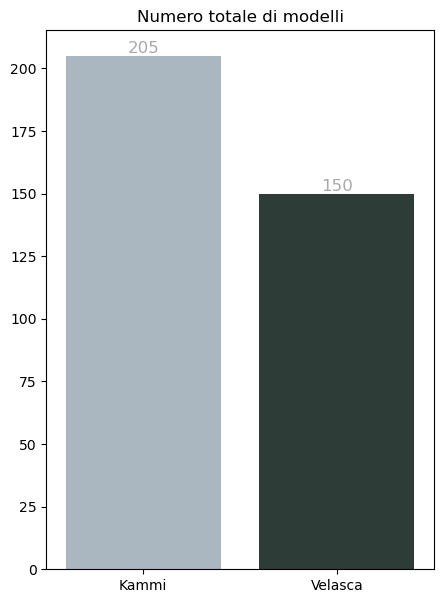

In [14]:
# creo un barchart per comparare il numero totale di scarpe del df_kammi con quello del df_velasca
somma_kammi = df_kammi['Tipologia'].count()
somma_velasca = df_velasca['Tipologia'].count()

print(f'La ditta Kammi ha a listino un totale di {somma_kammi} modelli estivi, mentre Velasca ne ha {somma_velasca}')

plt.figure(figsize=(5, 7))
colour_palette = ['#A7B7C3', '#2C3E39']
sns.barplot(x=['Kammi', 'Velasca'], y=[somma_kammi, somma_velasca], palette=colour_palette, hue=['Kammi', 'Velasca'])
plt.title('Numero totale di modelli')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

## Grafico scarpe per genere

,Kammi,Velasca
Sesso,,
Donna,168,82
Uomo,37,68


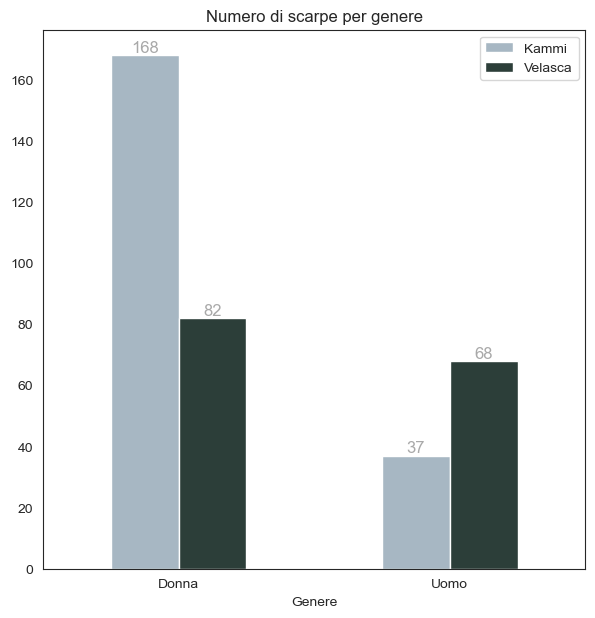

In [15]:
# creo un grafico per comparare il numero di scarpe per genere dei due df
sesso_kammi = df_kammi['Sesso'].value_counts()
sesso_velasca = df_velasca['Sesso'].value_counts()
df_sesso = pd.DataFrame({'Kammi': sesso_kammi, 'Velasca': sesso_velasca})

display(df_sesso)

sns.set_style('white')
colour_palette = ['#A7B7C3', '#2C3E39']
df_sesso.plot(kind='bar', figsize=(7, 7), color=colour_palette)
plt.title('Numero di scarpe per genere')
plt.xlabel('Genere')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

Kammi ha in catalogo più del doppio di modelli per donna rispetto a Velasca, mentre ne offre la metà per i modelli da uomo.

## Grafico tipologie di scarpe

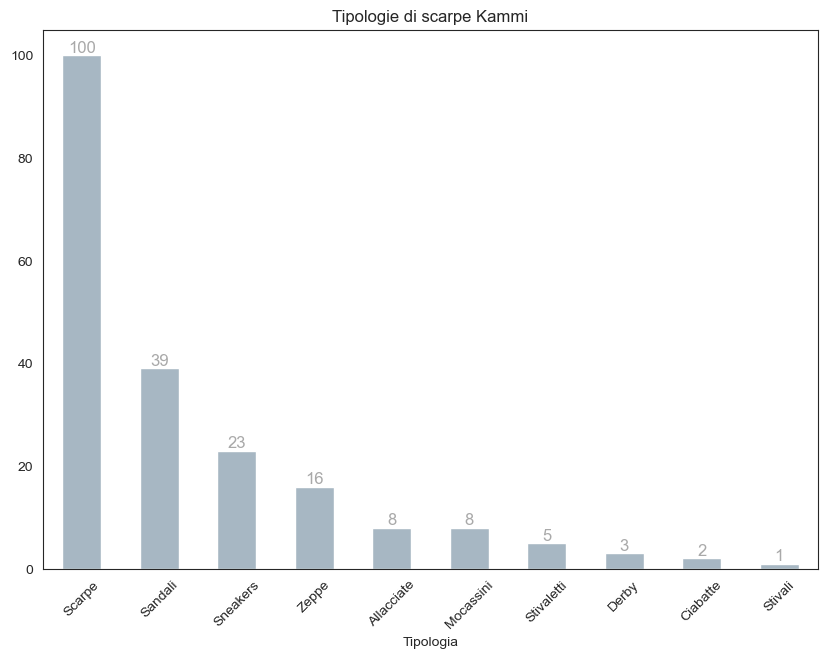

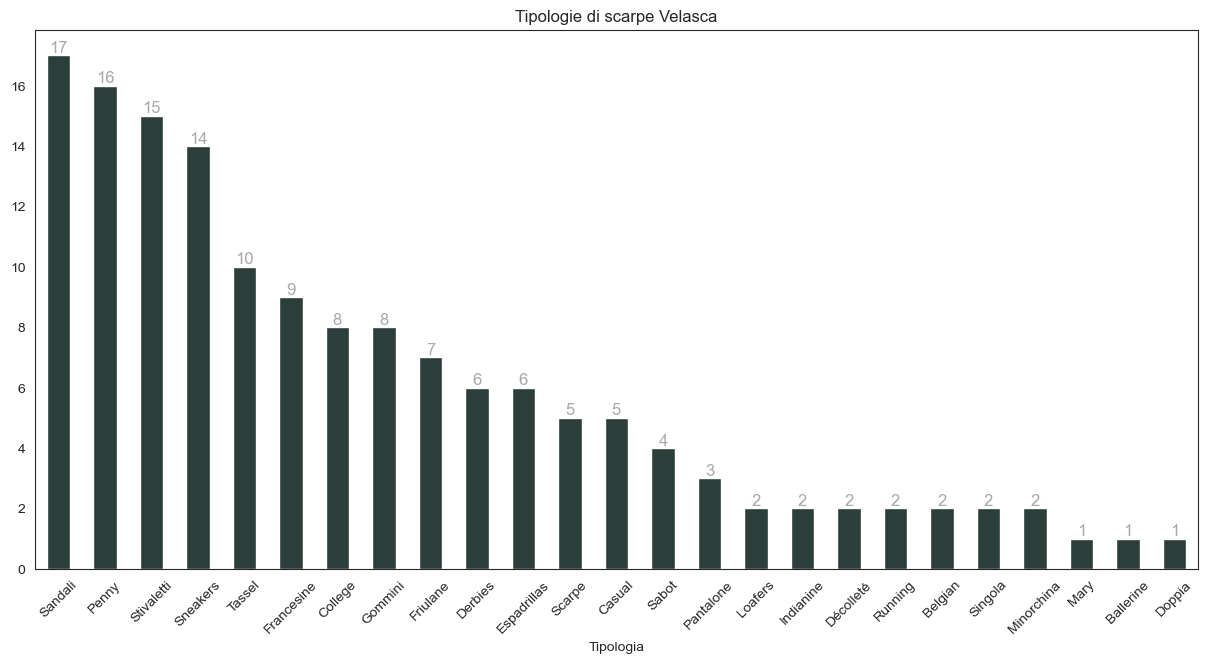

In [16]:
# creo un bar chart con le tipologie di scarpe di df_kammi in ordine di grandezza
tipologia_kammi = df_kammi['Tipologia'].value_counts().sort_values(ascending=False)
sns.set_style('white')
colour_kammi = ['#A7B7C3']
tipologia_kammi.plot(kind='bar', figsize=(10, 7), color=colour_kammi)
plt.title('Tipologie di scarpe Kammi')
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

# creo un bar chart con le tipologie di scarpe di df_velasca in ordine di grandezza
tipologia_velasca = df_velasca['Tipologia'].value_counts().sort_values(ascending=False)
sns.set_style('white')
colour_velasca = ['#2C3E39']
tipologia_velasca.plot(kind='bar', figsize=(15, 7), color=colour_velasca)
plt.title('Tipologie di scarpe Velasca')
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

- Velasca ha una quantità maggiore di tipologie di modelli a catalogo rispetto a Kammi
- La categoria principale di Kammi sono le scarpe (con o senza tacco) ed ha un numero pari a circa 2.5x la seconda categoria
- La categoria principale di Velasca sono i sandali, ma a differenza di Kammi, produce quasi in egual numero sia i penny loafers che gli stivaletti
- Velasca, ripsetto a Kammi, offre una maggiore scelta ai potenziali clienti -> può attrarre un più ampio bacino di utenti

## Grafico colori scarpe

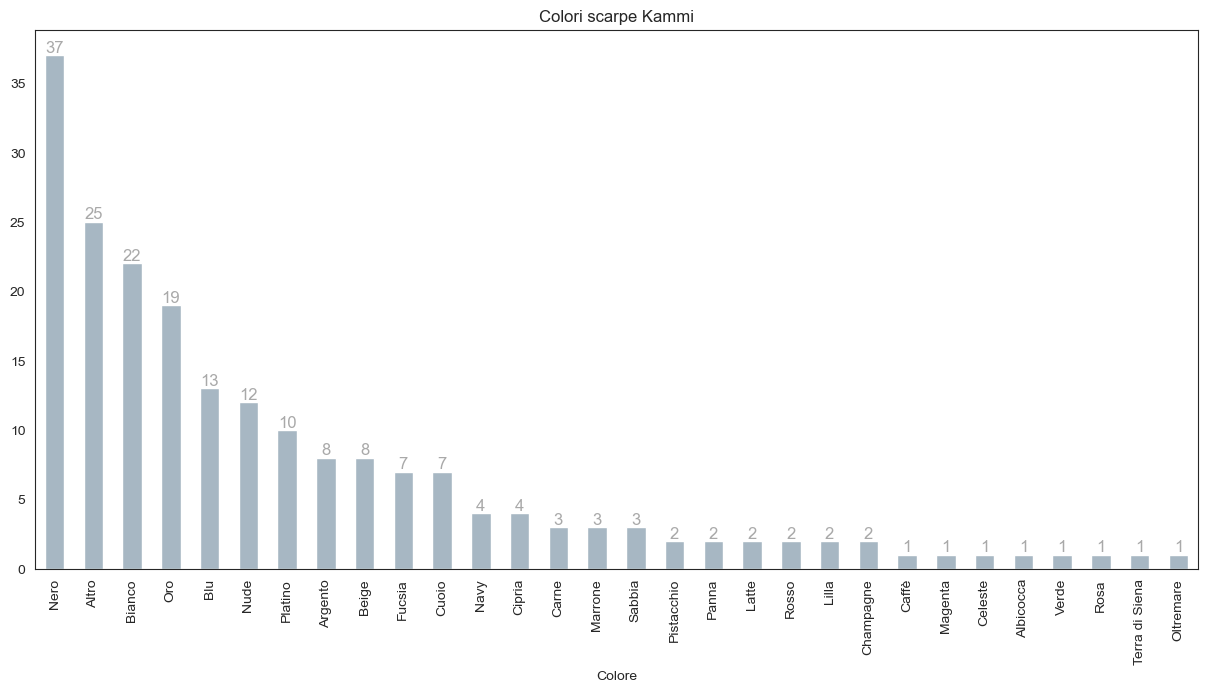

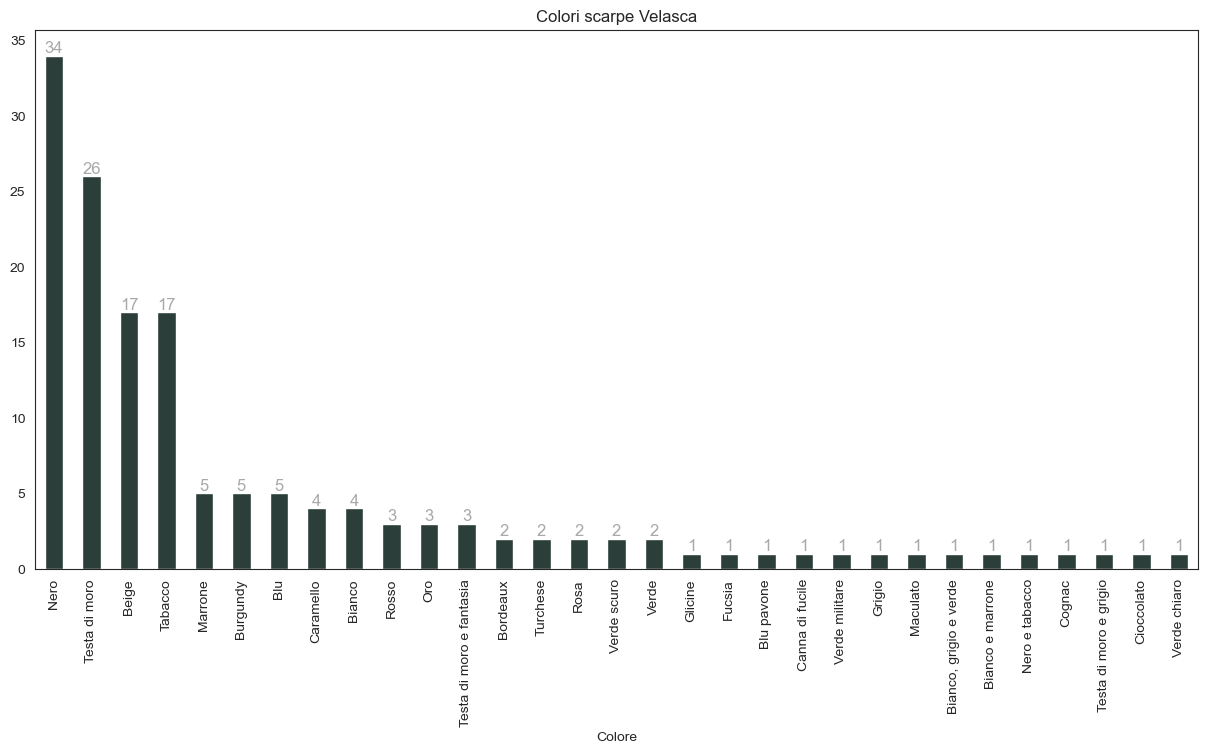

,Kammi,Velasca
Colore,,
Beige,8.0,17.0
Bianco,22.0,4.0
Blu,13.0,5.0
Fucsia,7.0,1.0
Marrone,3.0,5.0
Nero,37.0,34.0
Oro,19.0,3.0
Rosa,1.0,2.0
Rosso,2.0,3.0


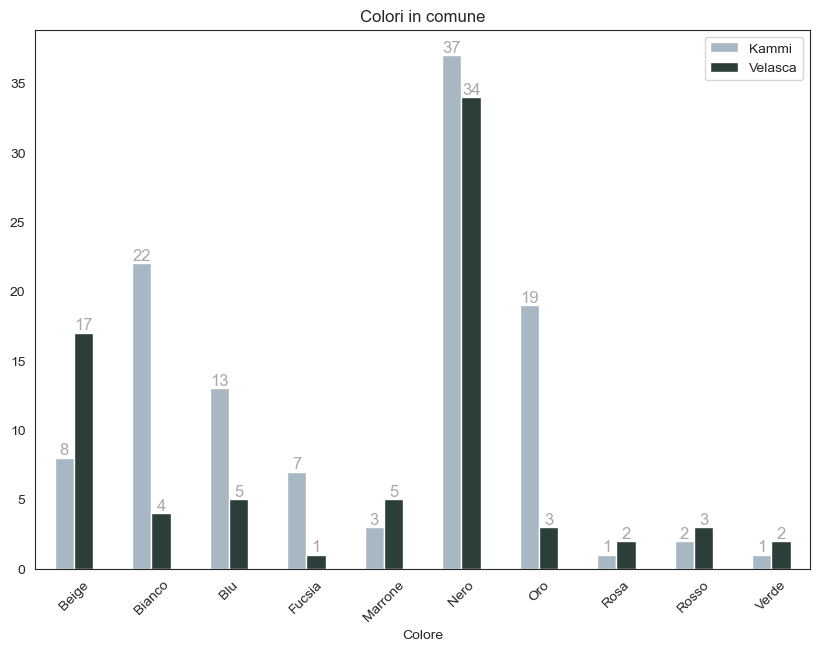

In [17]:
# creo un barchart per mostrare i colori delle scarpe di df_kammi
colore_kammi = df_kammi['Colore'].value_counts().sort_values(ascending=False)
sns.set_style('white')
colour_kammi = ['#A7B7C3']
colore_kammi.plot(kind='bar', figsize=(15, 7), color=colour_kammi)
plt.title('Colori scarpe Kammi')
plt.xticks(rotation=90)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

# creo un barchart per mostrare i colori delle scarpe di df_velasca
colore_velasca = df_velasca['Colore'].value_counts().sort_values(ascending=False)
sns.set_style('white')
colour_velasca = ['#2C3E39']
colore_velasca.plot(kind='bar', figsize=(15, 7), color=colour_velasca)
plt.title('Colori scarpe Velasca')
plt.xticks(rotation=90)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

# creo un df con i colori in comune tra i due df
df_colori = pd.DataFrame({'Kammi': colore_kammi, 'Velasca': colore_velasca}).dropna()
display(df_colori)

sns.set_style('white')
colour_palette = ['#A7B7C3', '#2C3E39']
df_colori.plot(kind='bar', figsize=(10, 7), color=colour_palette)
plt.title('Colori in comune')
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

- Il nero è il colore predominante per entrambe le aziende
- le aziende predentato una gamma colori abbastanza sortita
- Kammi ha un catalogo con maggioranza di colori freddi, mentre Velasca offre colori più caldi
- Kammi ha colori più appariscenti, mentre Velasca ha tonalità più tradizionali

## Grafico fasce di prezzo

In [18]:
# identifico le fasce di prezzo minimo e massimo
df_kammi['Prezzo'].min(), df_kammi['Prezzo'].max()
df_velasca['Prezzo'].min(), df_velasca['Prezzo'].max()

# creo le fasce di prezzo
bins = [0, 50, 100, 150, 200, 250, 300, 350]

# creo le etichette per le fasce di prezzo
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350']

# creo la colonna 'Fasce_di_prezzo' nel df_kammi e df_velasca
df_kammi_copy['Fasce_di_prezzo'] = pd.cut(df_kammi['Prezzo'], bins=bins, labels=labels)
df_velasca_copy['Fasce_di_prezzo'] = pd.cut(df_velasca['Prezzo'], bins=bins, labels=labels)

,Kammi,Velasca
Fasce_di_prezzo,,
0-50,19,0
50-100,154,8
100-150,32,17
150-200,0,23
200-250,0,38
250-300,0,40
300-350,0,13


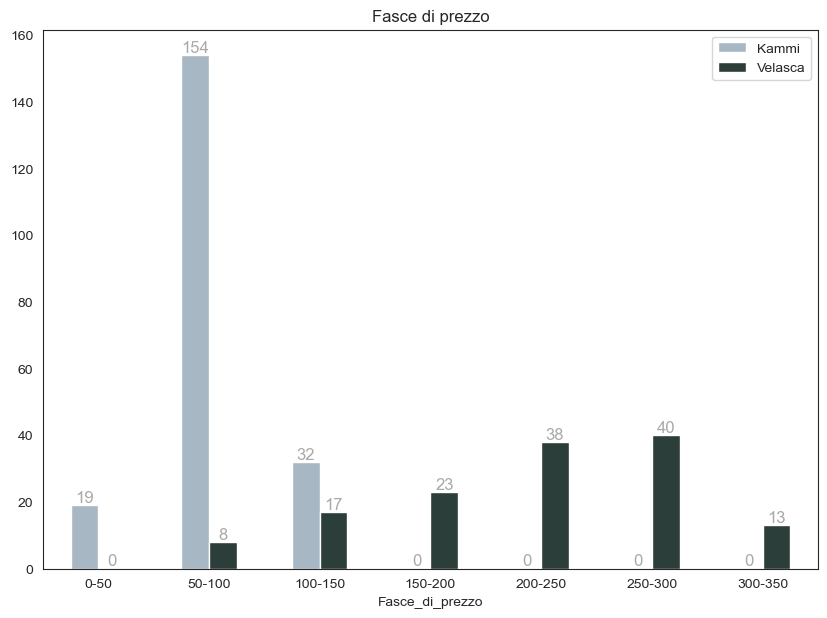

In [19]:
# creo un grafico barchart combinato per mostrare le fasce di prezzo in ordine crescente di df_kammi e df_velasca
df_kammi_fasce = df_kammi_copy['Fasce_di_prezzo'].value_counts().sort_index()
df_velasca_fasce = df_velasca_copy['Fasce_di_prezzo'].value_counts().sort_index()
df_fasce = pd.DataFrame({'Kammi': df_kammi_fasce, 'Velasca': df_velasca_fasce})

display(df_fasce)

sns.set_style('white')
colour_palette = ['#A7B7C3', '#2C3E39']
df_fasce.plot(kind='bar', figsize=(10, 7), color=colour_palette)
plt.title('Fasce di prezzo')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

- Il target di Kammi è fascia bassa, mentre Velasca punta su una fascia di prezzo medio-alto
- Velasca offre i propri prodotti con una varietà di prezzi più ampia -> maggior possibilità di acquirenti

## Grafico fasce di prezzo / genere

In [20]:
# creo un grafico barchart combinato per mostrare le fasce di prezzo in ordine crescente per sesso di df_kammi e df_velasca
# creo una nuova variabile contenente le colonne 'Fasce_di_prezzo' e 'Sesso' di df_kammi_copy e df_velasca_copy
df_kammi_fasce_sesso = df_kammi_copy[['Fasce_di_prezzo', 'Sesso']]
df_velasca_fasce_sesso = df_velasca_copy[['Fasce_di_prezzo', 'Sesso']]
df_fasce_sesso = pd.concat([df_kammi_fasce_sesso, df_velasca_fasce_sesso])

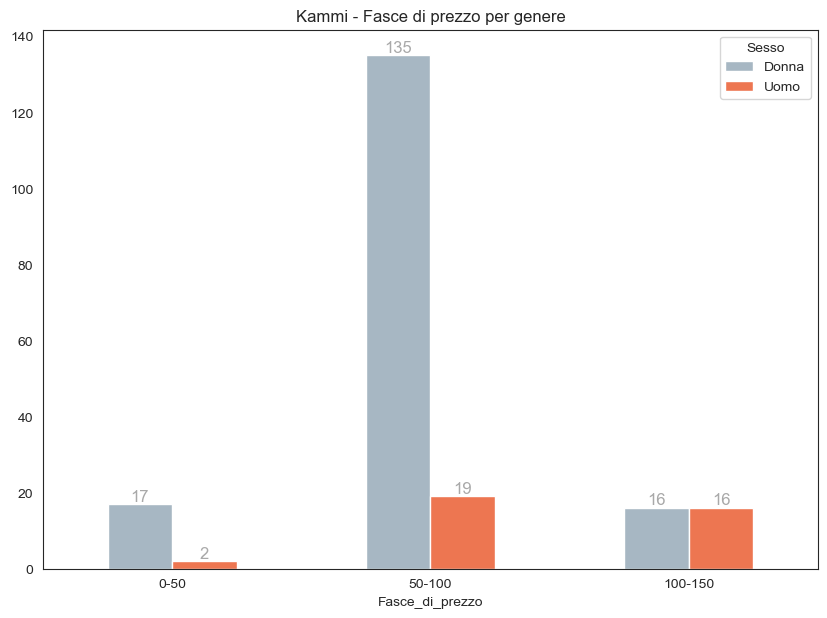

In [21]:
# creo un grafico barchart per mostrare le fasce di prezzo in ordine crescente per sesso di df_kammi
df_kammi_fasce_sesso = df_kammi_fasce_sesso.groupby(['Fasce_di_prezzo', 'Sesso'], observed=True).size().unstack()
df_kammi_fasce_sesso = df_kammi_fasce_sesso.fillna(0)

sns.set_style('white')
colour_palette = ['#A7B7C3', '#ED7651']
df_kammi_fasce_sesso.plot(kind='bar', figsize=(10, 7), color=colour_palette)
plt.title('Kammi - Fasce di prezzo per genere')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

- Il target primario di Kammi è rappresentato dalle donne
- La quasi totalità dei prodotti è nella fascia di prezzo 50-100€
- I modelli da uomo nella fascia più bassa sono solo due

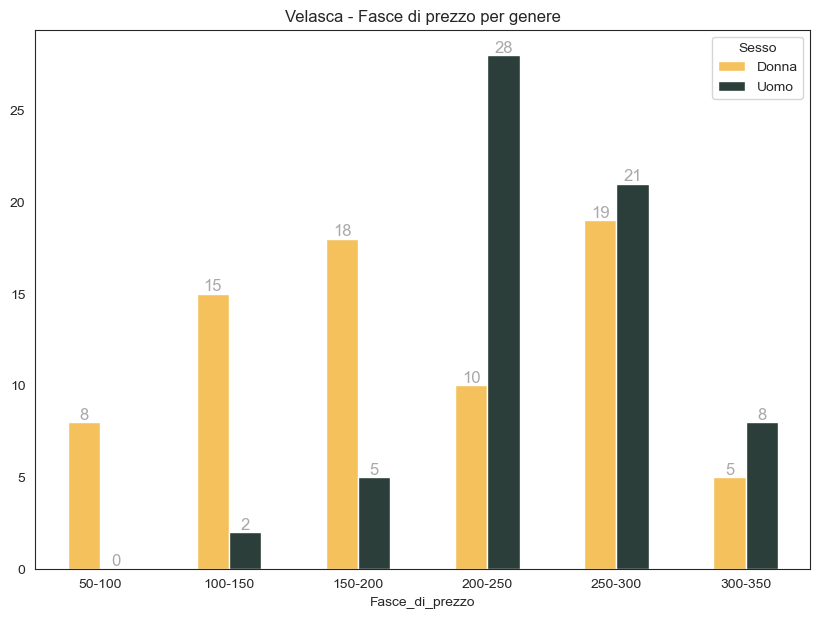

In [22]:
# creo un grafico barchart per mostrare le fasce di prezzo in ordine crescente per sesso di df_velasca
df_velasca_fasce_sesso = df_velasca_fasce_sesso.groupby(['Fasce_di_prezzo', 'Sesso'], observed=True).size().unstack()
df_velasca_fasce_sesso = df_velasca_fasce_sesso.fillna(0)

sns.set_style('white')
colour_palette = ['#F4C15D', '#2C3E39']
df_velasca_fasce_sesso.plot(kind='bar', figsize=(10, 7), color=colour_palette)
plt.title('Velasca - Fasce di prezzo per genere')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

- la maggior parte dei modelli da uomo risiedono nelle fasce più costose (200-300€)
- I modelli da donna sono più omogeneizzati nelle varie fasce di prezzo

## Grafici per fasce prezzo / tipologia

In [23]:
# raggruppo per 'Tipologia' e 'Fasce_di_prezzo' e, per ogni tipologia, identifico il prezzo massimo e minimo nel df_kammi_copy e df_velasca_copy
df_kammi_prezzo = df_kammi_copy.groupby(['Tipologia', 'Fasce_di_prezzo'], observed=True)['Prezzo'].agg(['min', 'max']).dropna()
df_velasca_prezzo = df_velasca_copy.groupby(['Tipologia', 'Fasce_di_prezzo'], observed=True)['Prezzo'].agg(['min', 'max']).dropna()

display(df_kammi_prezzo)
display(df_velasca_prezzo)

min    max
Tipologia  Fasce_di_prezzo              
Allacciate 50-100            59.9   99.9
Ciabatte   0-50              25.0   25.0
Derby      100-150          109.0  109.0
Mocassini  50-100            59.9   79.9
           100-150          119.0  119.0
Sandali    0-50              25.0   45.0
           50-100            55.0   99.9
Scarpe     0-50              49.9   49.9
           50-100            55.0   99.9
           100-150          105.0  135.0
Sneakers   50-100            79.9   99.9
           100-150          105.0  145.0
Stivaletti 50-100            69.0   69.0
           100-150          119.0  119.0
Stivali    100-150          139.0  139.0
Zeppe      0-50              45.0   45.0
           50-100            69.9   95.0

min    max
Tipologia   Fasce_di_prezzo              
Altro       50-100            72.0   72.0
            100-150          144.0  144.0
            150-200          156.0  190.0
            200-250          208.0  240.0
            250-300          275.0  295.0
            300-350          320.0  320.0
Casual      200-250          240.0  240.0
            250-300          275.0  275.0
            300-350          340.0  340.0
College     150-200          165.0  165.0
            200-250          208.0  232.0
            250-300          275.0  275.0
            300-350          320.0  320.0
Derbies     150-200          165.0  168.0
            200-250          232.0  240.0
            300-350          320.0  320.0
Espadrillas 50-100            96.0   96.0
            100-150          140.0  140.0
            150-200          160.0  160.0
            200-250          224.0  240.0
            250-300          256.0  256.0
Francesine  150-200          177.0  177.0
            200-250          228.0  228.0
            250-300          252.0  295.0
Friulane    50-100            75.0   98.0
            100-150          132.0  150.0
            250-300          295.0  295.0
Gommini     150-200          156.0  156.0
            250-300          260.0  295.0
            300-350          320.0  320.0
Penny       150-200          165.0  165.0
            200-250          224.0  240.0
            250-300          275.0  295.0
            300-350          320.0  340.0
Sandali     50-100            90.0   90.0
            100-150          105.0  140.0
            150-200          175.0  195.0
            250-300          260.0  280.0
Scarpe      100-150          144.0  144.0
            200-250          208.0  240.0
Sneakers    100-150          117.0  144.0
            200-250          208.0  240.0
            250-300          272.0  272.0
            300-350          304.0  304.0
Stivaletti  200-250          216.0  228.0
            250-300          256.0  256.0
            300-350          304.0  340.0
Tassel      150-200          192.0  195.0
            200-250          216.0  224.0
            250-300          295.0  295.0
            300-350          320.0  320.0

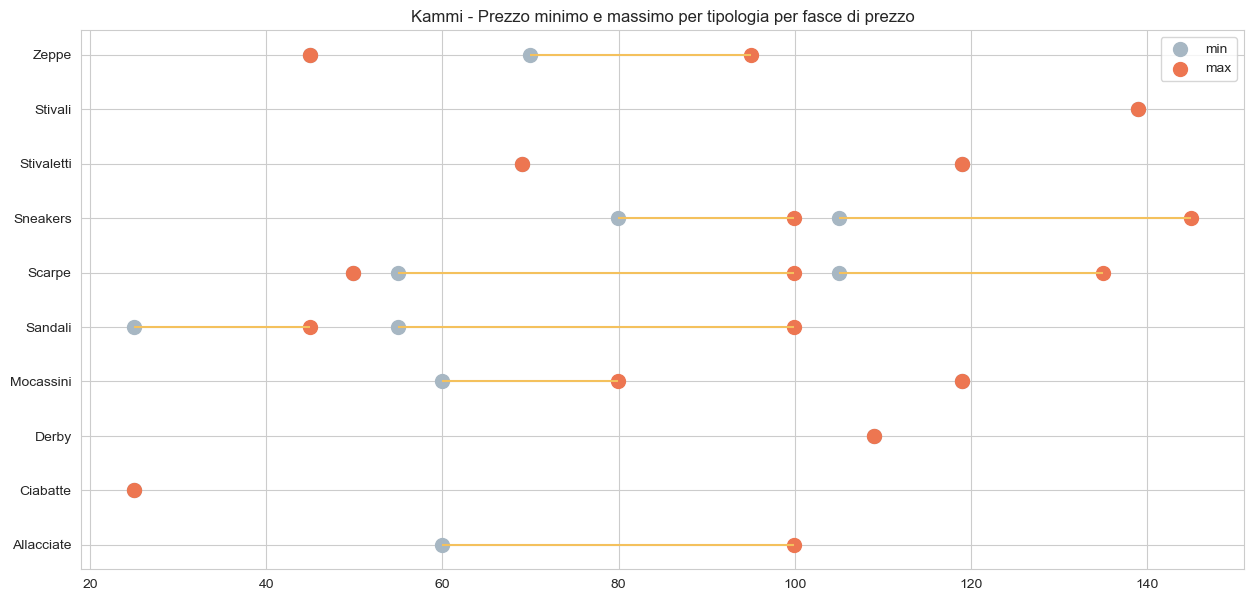

In [24]:
# creo un grafico lollipop orizzontale per mostrare il prezzo minimo e massimo per tipologia del df_kammi
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
plt.hlines(y=df_kammi_prezzo.index.get_level_values(0), xmin=df_kammi_prezzo['min'], xmax=df_kammi_prezzo['max'], color='#F4C15D')
plt.scatter(df_kammi_prezzo['min'], df_kammi_prezzo.index.get_level_values(0), color='#A7B7C3', label='min', s=100)
plt.scatter(df_kammi_prezzo['max'], df_kammi_prezzo.index.get_level_values(0), color='#ED7651', label='max', s=100)
plt.legend()
plt.title('Kammi - Prezzo minimo e massimo per tipologia per fasce di prezzo')
plt.show()

- Per alcune tipologie di scarpe c'è una forte variazione nel prezzo (es. scarpe o sanddali)

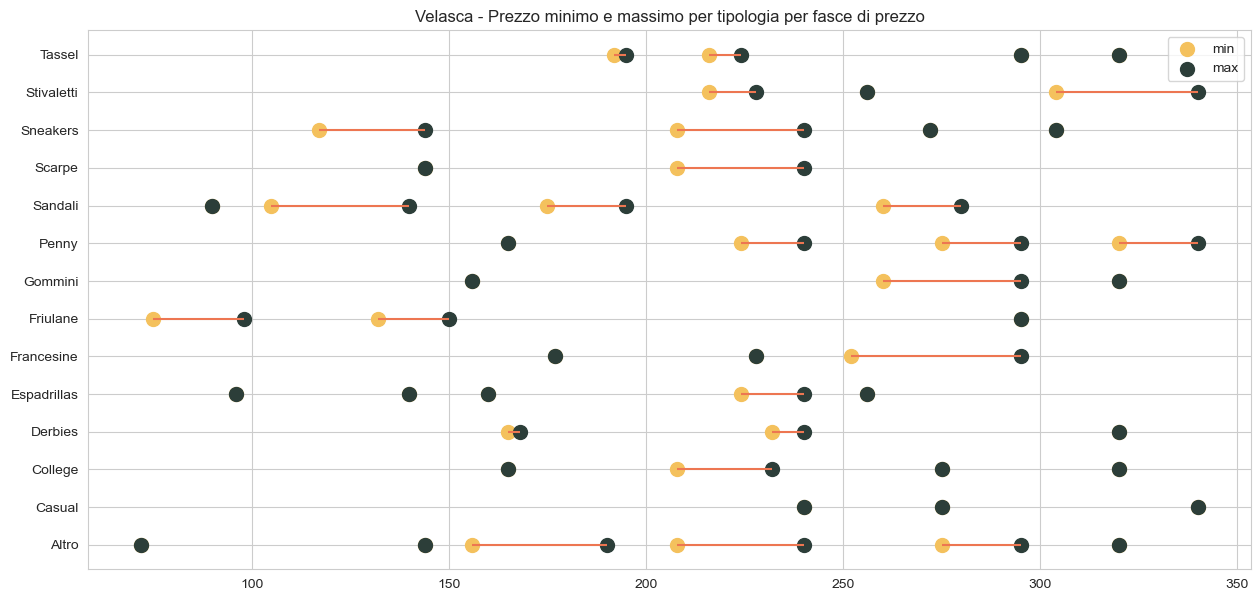

In [25]:
# creo un grafico lollipop per mostrare il prezzo minimo e massimo per tipologia del df_velasca
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
plt.hlines(y=df_velasca_prezzo.index.get_level_values(0), xmin=df_velasca_prezzo['min'], xmax=df_velasca_prezzo['max'], color='#ED7651')
plt.scatter(df_velasca_prezzo['min'], df_velasca_prezzo.index.get_level_values(0), color='#F4C15D', label='min', s=100)
plt.scatter(df_velasca_prezzo['max'], df_velasca_prezzo.index.get_level_values(0), color='#2C3E39', label='max', s=100)
plt.legend()
plt.title('Velasca - Prezzo minimo e massimo per tipologia per fasce di prezzo')
plt.show()

- Velasca presenta una minor variazione di prezzo per la stessa tipologia nelle varie fasce di prezzo
- Per ogni fascia di prezzo è quasi sempre presente almeno un modello

## Grafici per fasce prezzo / tomaia

In [26]:
# raggruppo per 'Tomaia' e 'Fasce_di_prezzo' e, per ogni tomaia, identifico il prezzo massimo e minimo nel df_kammi_copy e df_velasca_copy
df_kammi_tomaia = df_kammi_copy.groupby(['Tomaia', 'Fasce_di_prezzo'], observed=True)['Prezzo'].agg(['min', 'max']).dropna()
df_velasca_tomaia = df_velasca_copy.groupby(['Tomaia', 'Fasce_di_prezzo'], observed=True)['Prezzo'].agg(['min', 'max']).dropna()

display(df_kammi_tomaia)
display(df_velasca_tomaia)

min    max
Tomaia    Fasce_di_prezzo              
Pelle     0-50              39.9   49.9
          50-100            55.0   99.9
          100-150          105.0  145.0
Sintetico 0-50              25.0   25.0
          50-100            59.9   99.9
          100-150          135.0  135.0
Tessuto   0-50              45.0   49.9
          50-100            55.0   99.9
          100-150          129.0  129.0
Vernice   50-100            79.9   79.9
          100-150          129.0  129.0

min    max
Tomaia                                         Fasce_di_prezzo              
Lino                                           50-100            75.0   75.0
                                               100-150          117.0  140.0
Pelle effetto cavallino                        200-250          216.0  216.0
Pelle laminata                                 150-200          175.0  190.0
                                               250-300          280.0  295.0
Pelle liscia                                   100-150          105.0  144.0
                                               150-200          156.0  195.0
                                               200-250          216.0  240.0
                                               250-300          252.0  295.0
                                               300-350          320.0  340.0
Pelle liscia abrasivata                        200-250          224.0  224.0
                                               250-300          275.0  295.0
                                               300-350          320.0  320.0
Pelle liscia anticata                          200-250          208.0  232.0
Pelle liscia e intrecciata                     100-150          117.0  117.0
                                               150-200          192.0  192.0
                                               200-250          230.0  240.0
                                               250-300          260.0  280.0
                                               300-350          320.0  340.0
Pelle liscia e lana                            250-300          252.0  252.0
Pelle liscia ingrassata                        200-250          224.0  224.0
Pelle liscia scamosciata                       200-250          228.0  228.0
                                               250-300          272.0  272.0
Pelle martellata                               100-150          117.0  117.0
                                               200-250          240.0  240.0
                                               250-300          256.0  295.0
                                               300-350          304.0  304.0
Pelle martellata e scamosciata                 200-250          208.0  208.0
Pelle nubuck                                   50-100            72.0   72.0
Pelle nubuck ingrassata                        200-250          240.0  240.0
Pelle nubuck scamosciata ingrassata martellata 200-250          224.0  224.0
Pelle scamosciata                              50-100            90.0   96.0
                                               100-150          108.0  150.0
                                               150-200          156.0  195.0
                                               200-250          208.0  240.0
                                               250-300          260.0  295.0
                                               300-350          320.0  320.0
Pelle scamosciata e nubuck                     200-250          240.0  240.0
Pelle scamosciata e nubuck ingrassato          200-250          240.0  240.0
Pelle scamosciata e tessuto                    150-200          165.0  165.0
Pelle scamosciata ingrassata                   100-150          144.0  144.0
                                               200-250          208.0  240.0
                                               300-350          340.0  340.0
Pelle stampa pitone                            200-250          228.0  228.0
Rafia                                          100-150          108.0  108.0
Raso                                           100-150          132.0  132.0
Velluto                                        50-100            98.0   98.0

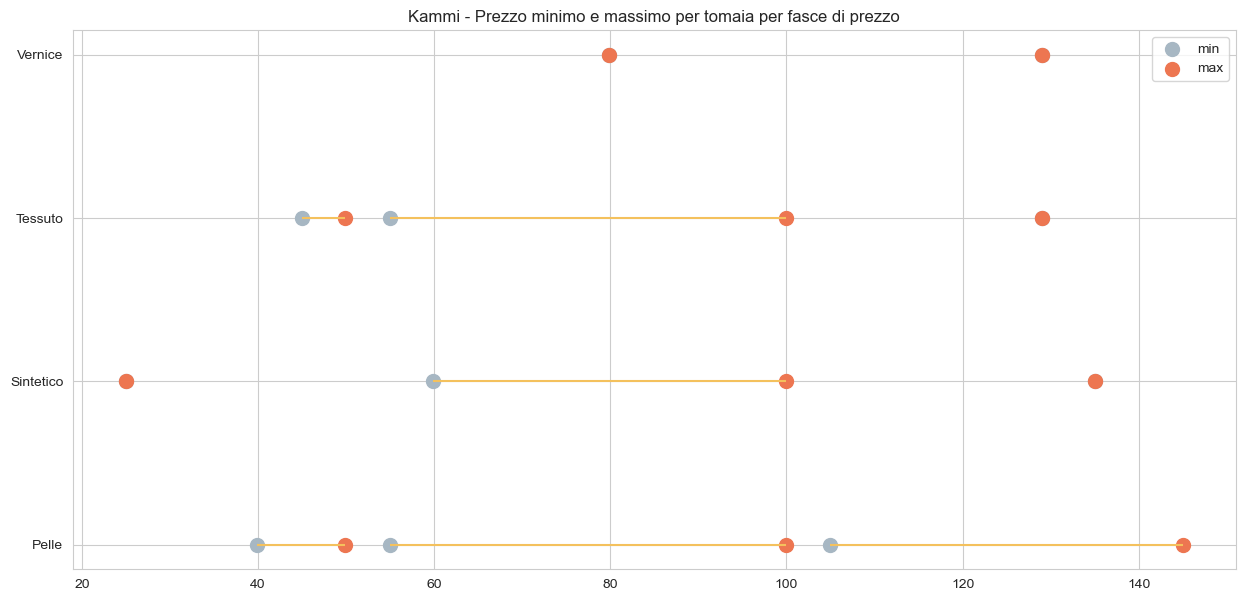

In [27]:
# creo un grafico lollipop orizzontale per mostrare il prezzo minimo e massimo per tomaia del df_kammi
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
plt.hlines(y=df_kammi_tomaia.index.get_level_values(0), xmin=df_kammi_tomaia['min'], xmax=df_kammi_tomaia['max'], color='#F4C15D')
plt.scatter(df_kammi_tomaia['min'], df_kammi_tomaia.index.get_level_values(0), color='#A7B7C3', label='min', s=100)
plt.scatter(df_kammi_tomaia['max'], df_kammi_tomaia.index.get_level_values(0), color='#ED7651', label='max', s=100)
plt.legend()
plt.title('Kammi - Prezzo minimo e massimo per tomaia per fasce di prezzo')
plt.show()

- - Per alcuni materiali c'è una forte variazione nel prezzo (es. scarpe o sanddali)

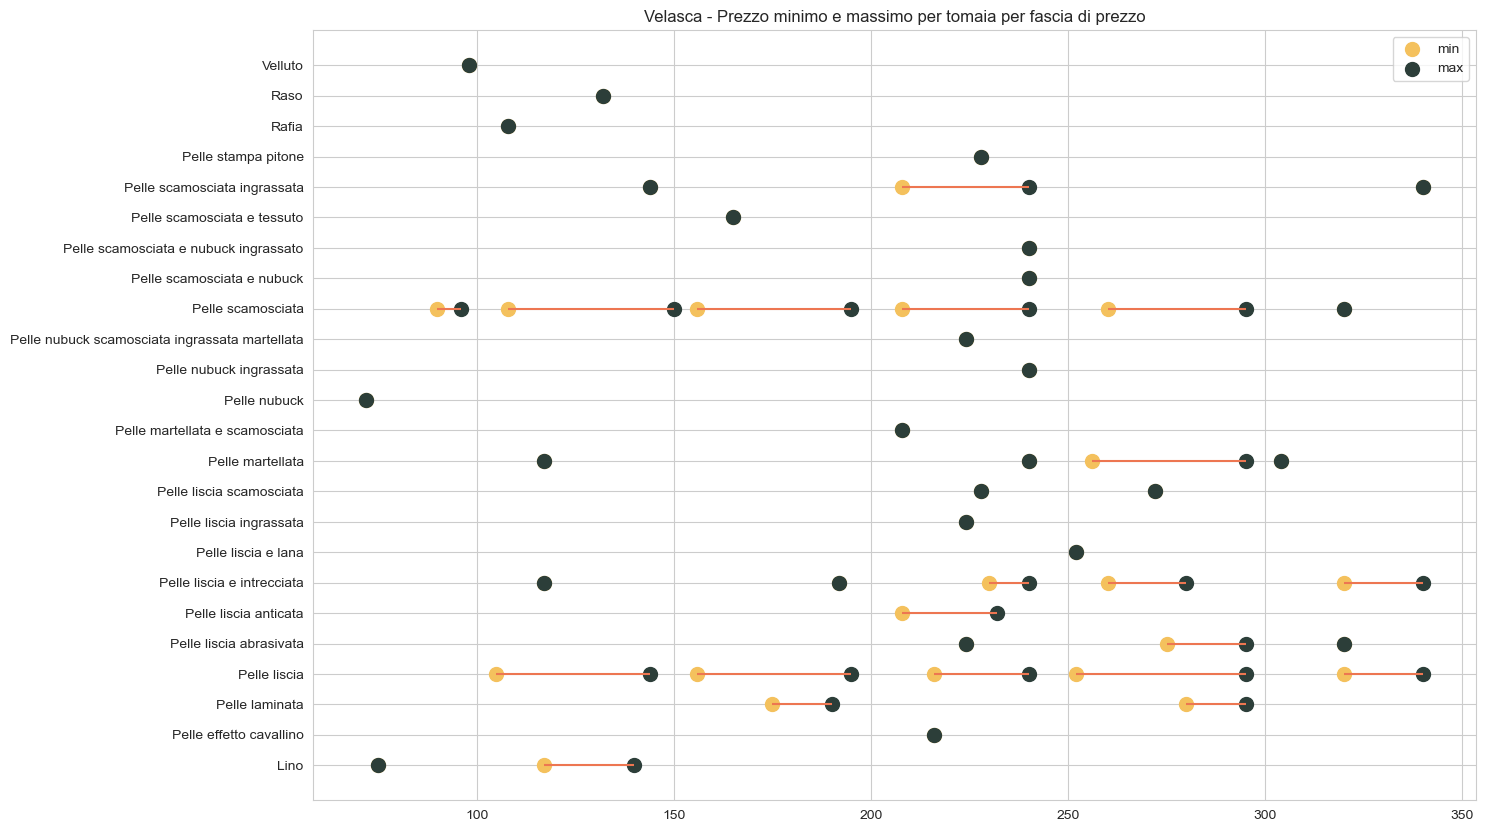

In [28]:
# creo un grafico lollipop orizzontale per mostrare il prezzo minimo e massimo per tomaia del df_velasca
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
plt.hlines(y=df_velasca_tomaia.index.get_level_values(0), xmin=df_velasca_tomaia['min'], xmax=df_velasca_tomaia['max'], color='#ED7651')
plt.scatter(df_velasca_tomaia['min'], df_velasca_tomaia.index.get_level_values(0), color='#F4C15D', label='min', s=100)
plt.scatter(df_velasca_tomaia['max'], df_velasca_tomaia.index.get_level_values(0), color='#2C3E39', label='max', s=100)
plt.legend()
plt.title('Velasca - Prezzo minimo e massimo per tomaia per fascia di prezzo')
plt.show()

- Velasca ha una distribuzione più uniforme di materiale
- La pelle liscia e pelle scamosciata rappresentano i materiali più presenti a catalogo

## Grafici margine medio per tipologia

In [29]:
# raggruppo il df_velasca_copy per tipologia, escludo 'Altro' e calcolo la media del prezzo
prezzo_medio_cat_velasca = df_velasca_copy[df_velasca_copy['Tipologia'] != 'Altro'].groupby('Tipologia')['Prezzo'].mean().round(2)

prezzo_medio_cat_velasca

Tipologia
Casual         281.00
College        294.00
Derbies        307.50
Espadrillas    186.00
Francesine     274.33
Friulane       135.14
Gommini        236.62
Penny          264.62
Sandali        172.65
Scarpe         201.60
Sneakers       225.79
Stivaletti     310.40
Tassel         307.20
Name: Prezzo, dtype: float64

In [30]:
# raggruppo il df_velasca_copy per tipologia, escludo 'Altro' e calcolo la media del margine
margine_medio_cat_velasca = df_velasca_copy[df_velasca_copy['Tipologia'] != 'Altro'].groupby('Tipologia')['Margine'].mean().round(2)

margine_medio_cat_velasca

Tipologia
Casual         67.44
College        70.56
Derbies        73.80
Espadrillas    44.64
Francesine     65.84
Friulane       32.43
Gommini        56.79
Penny          63.51
Sandali        41.44
Scarpe         48.38
Sneakers       54.19
Stivaletti     74.50
Tassel         73.73
Name: Margine, dtype: float64

In [31]:
# creo un df con i valori medi di prezzo e margine per tipologia di scarpe di Velasca
df_medie_velasca = pd.DataFrame({'Prezzo_medio': prezzo_medio_cat_velasca, 'Margine_medio': margine_medio_cat_velasca})

df_medie_velasca

,Prezzo_medio,Margine_medio
Tipologia,,
Casual,281.00,67.44
College,294.00,70.56
Derbies,307.50,73.80
Espadrillas,186.00,44.64
Francesine,274.33,65.84
Friulane,135.14,32.43
Gommini,236.62,56.79
Penny,264.62,63.51
Sandali,172.65,41.44


In [32]:
# raggruppo il df_kammi_copy per tipologia e calcolo la media del prezzo
prezzo_medio_cat_kammi = df_kammi_copy.groupby('Tipologia')['Prezzo'].mean().round(2)

prezzo_medio_cat_kammi

Tipologia
Allacciate     79.95
Ciabatte       25.00
Derby         109.00
Mocassini      78.45
Sandali        66.72
Scarpe         86.28
Sneakers      103.51
Stivaletti    109.00
Stivali       139.00
Zeppe          73.99
Name: Prezzo, dtype: float64

In [33]:
# raggruppo il df_kammi_copy per tipologia e calcolo la media del margine
margine_medio_cat_kammi = df_kammi_copy.groupby('Tipologia')['Margine'].mean().round(2)

margine_medio_cat_kammi

Tipologia
Allacciate    23.19
Ciabatte       7.25
Derby         31.61
Mocassini     22.75
Sandali       19.35
Scarpe        25.02
Sneakers      30.02
Stivaletti    31.61
Stivali       40.31
Zeppe         21.46
Name: Margine, dtype: float64

In [34]:
# creo un df con i valori medi di prezzo e margine per tipologia di scarpe di Velasca
df_medie_kammi = pd.DataFrame({'Prezzo_medio': prezzo_medio_cat_kammi, 'Margine_medio': margine_medio_cat_kammi})

df_medie_kammi

,Prezzo_medio,Margine_medio
Tipologia,,
Allacciate,79.95,23.19
Ciabatte,25.00,7.25
Derby,109.00,31.61
Mocassini,78.45,22.75
Sandali,66.72,19.35
Scarpe,86.28,25.02
Sneakers,103.51,30.02
Stivaletti,109.00,31.61
Stivali,139.00,40.31


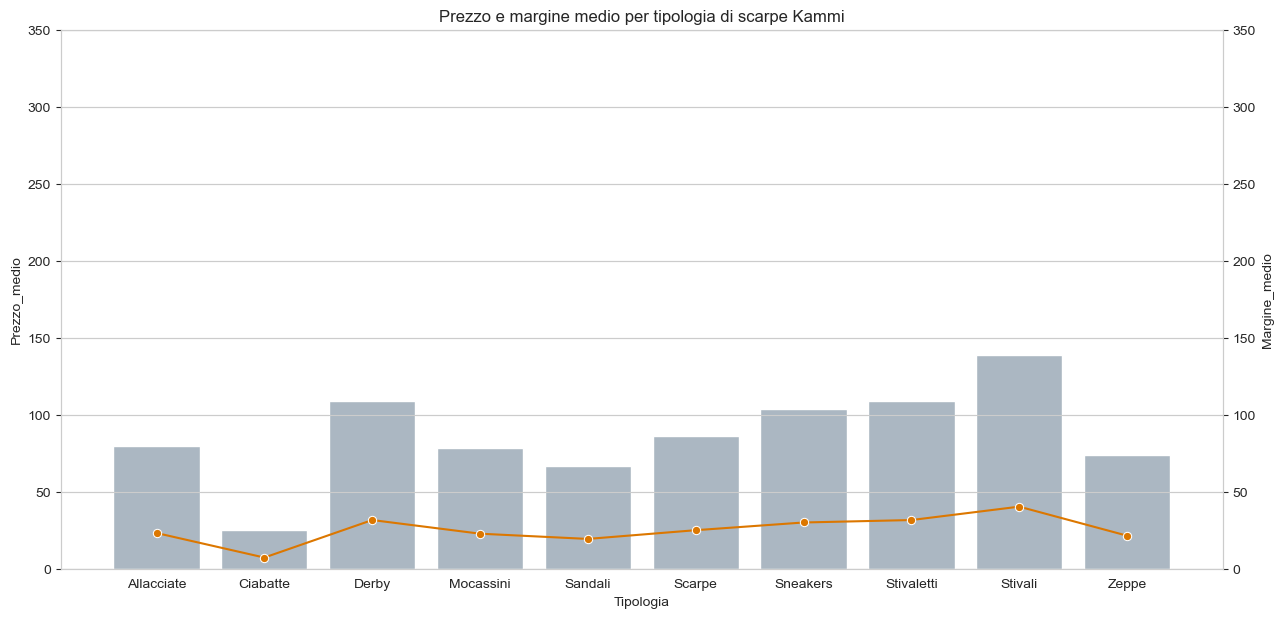

In [35]:
# credo un grafico combinato (barre e linee) con i valori medi di prezzo e margine per tipologia di scarpe di Kammi
fig, ax1 = plt.subplots(figsize=(15, 7))
sns.barplot(x=df_medie_kammi.index, y='Prezzo_medio', data=df_medie_kammi, ax=ax1, color='#A7B7C6')
ax2 = ax1.twinx()
sns.lineplot(x=df_medie_kammi.index, y='Margine_medio', data=df_medie_kammi, ax=ax2, color='#DC7700', marker='o')
ax1.set_ylim(0, 350)
ax2.set_ylim(0, 350)
ax2.set_yticks(ax1.get_yticks())
plt.title('Prezzo e margine medio per tipologia di scarpe Kammi')
plt.show()

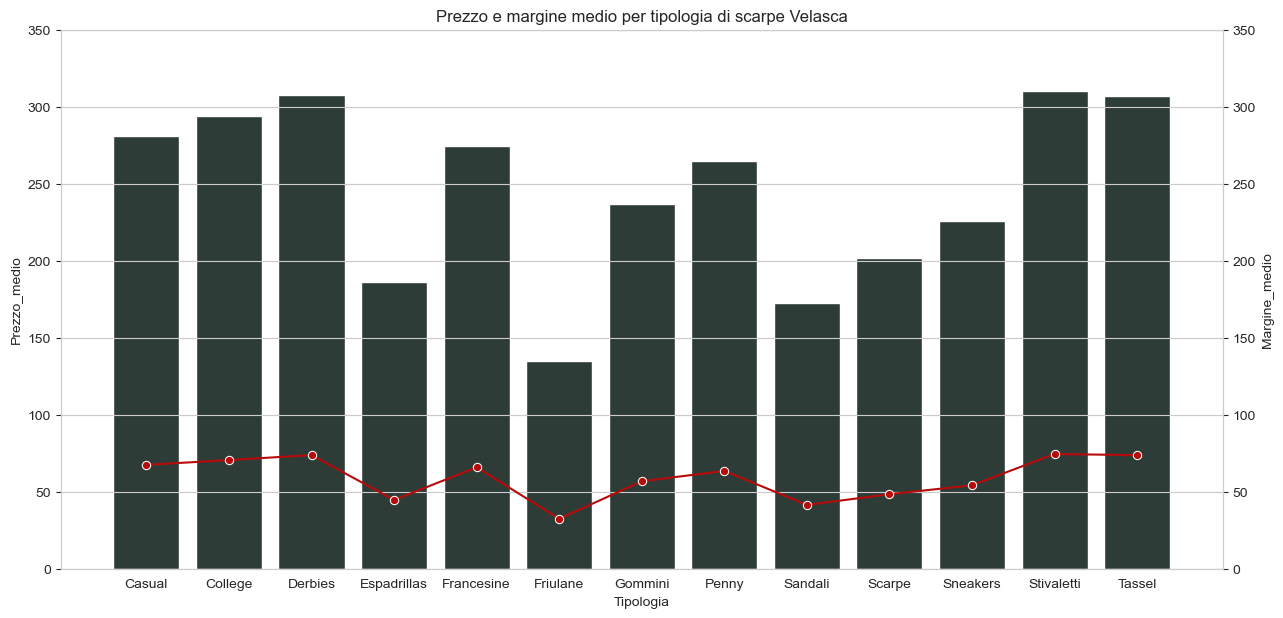

In [36]:
# credo un grafico combinato (barre e linee) con i valori medi di prezzo e margine per tipologia di scarpe di Velasca
fig, ax1 = plt.subplots(figsize=(15, 7))
sns.barplot(x=df_medie_velasca.index, y='Prezzo_medio', data=df_medie_velasca, ax=ax1, color='#2C3E39')
ax2 = ax1.twinx()
sns.lineplot(x=df_medie_velasca.index, y='Margine_medio', data=df_medie_velasca, ax=ax2, color='#B70A0A', marker='o')
ax1.set_ylim(0, 350)
ax2.set_ylim(0, 350)
ax2.set_yticks(ax1.get_yticks())
plt.title('Prezzo e margine medio per tipologia di scarpe Velasca')
plt.show()

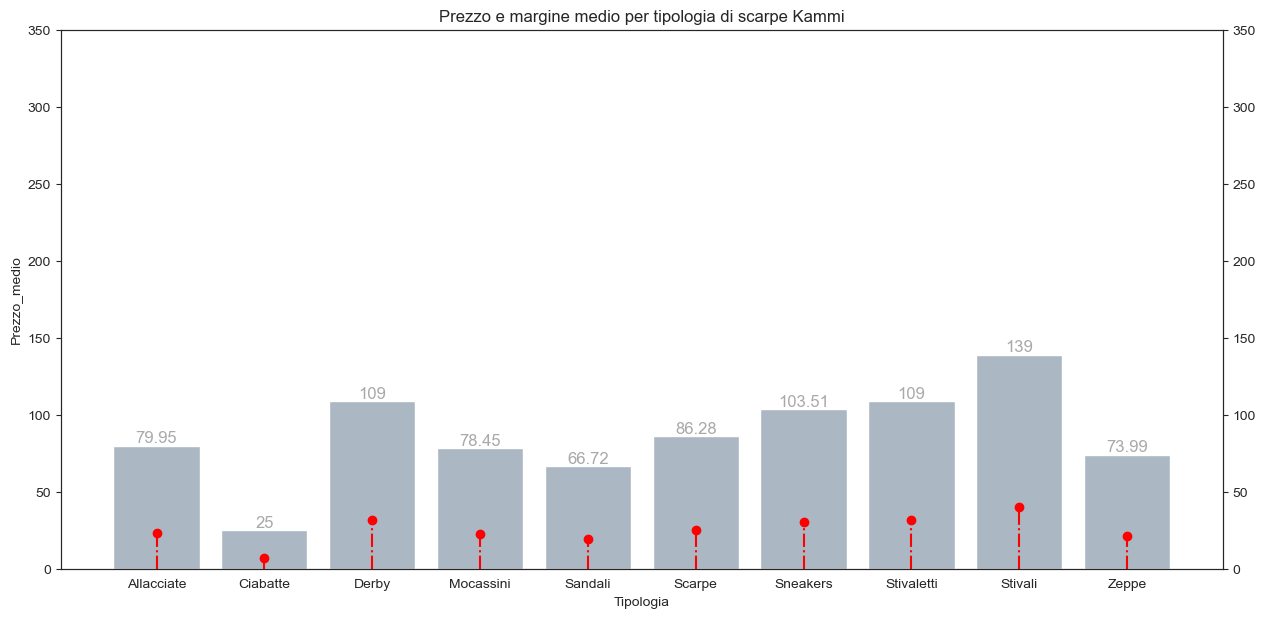

In [37]:
# credo un grafico combinato (bars and lollipop) con i valori medi di prezzo e margine per tipologia di scarpe di Kammi
sns.set_style('white')
fig, ax1 = plt.subplots(figsize=(15, 7))
sns.barplot(x=df_medie_kammi.index, y='Prezzo_medio', data=df_medie_kammi, ax=ax1, color='#A7B7C6')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
ax2 = ax1.twinx()
plt.stem(df_medie_kammi.index, df_medie_kammi['Margine_medio'], linefmt='r-.', markerfmt='ro', basefmt=' ')
ax1.set_ylim(0, 350)
ax2.set_ylim(0, 350)
ax2.set_yticks(ax1.get_yticks())
plt.title('Prezzo e margine medio per tipologia di scarpe Kammi')
plt.show()

- I margini dei modelli Derby e Stivali hanno il margine (espresso in valore assoluto) più alto
- Per marginare sul modello Ciabatte bisogna puntare a massimizzare le vendite

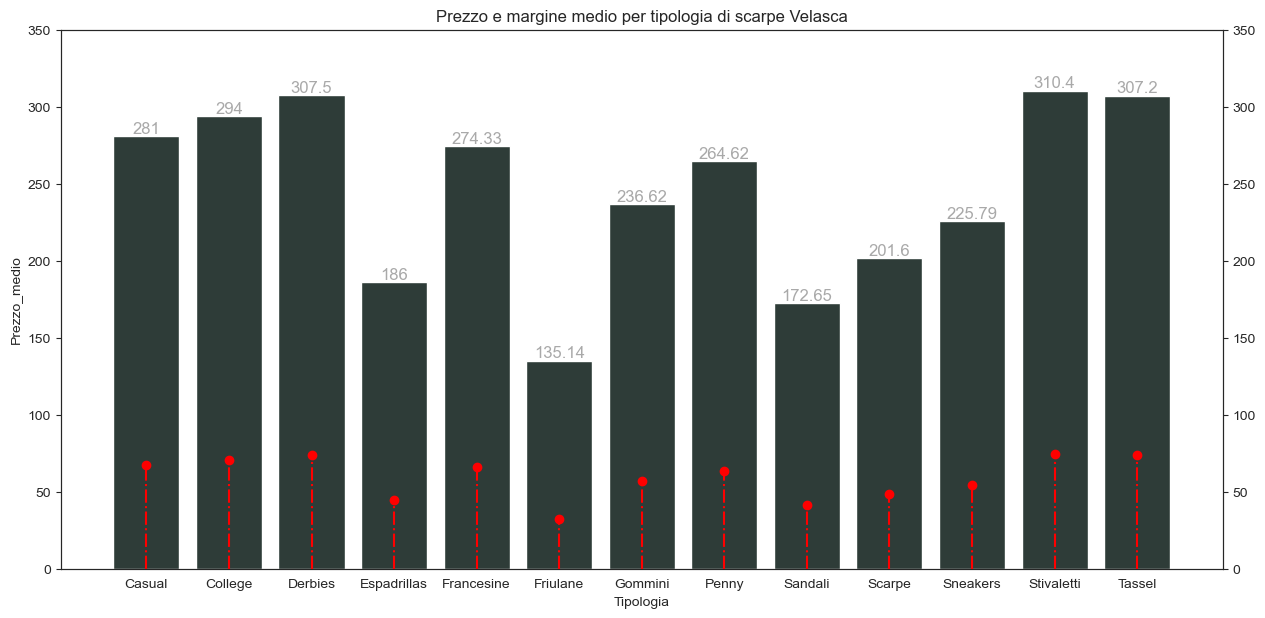

In [38]:
# credo un grafico combinato (bars and lollipop) con i valori medi di prezzo e margine per tipologia di scarpe di Velasca
sns.set_style('white')
fig, ax1 = plt.subplots(figsize=(15, 7))
sns.barplot(x=df_medie_velasca.index, y='Prezzo_medio', data=df_medie_velasca, ax=ax1, color='#2C3E39')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
ax2 = ax1.twinx()
plt.stem(df_medie_velasca.index, df_medie_velasca['Margine_medio'], linefmt='r-.', markerfmt='ro', basefmt=' ')
ax1.set_ylim(0, 350)
ax2.set_ylim(0, 350)
ax2.set_yticks(ax1.get_yticks())
plt.title('Prezzo e margine medio per tipologia di scarpe Velasca')
plt.show()


- I modelli Derbies, Stivaletti e Tassel sono i modelli mediamente più costosi e con un margine mediamente più alto del catalogo (in valore assoluto)

## Grafici margine medio per genere

In [54]:
# raggruppo il df_velasca_copy per genere e calcolo la media del prezzo
prezzo_medio_gen_velasca = df_velasca_copy.groupby('Sesso')['Prezzo'].mean().round(2)

prezzo_medio_gen_velasca

Sesso
Donna    213.51
Uomo     271.96
Name: Prezzo, dtype: float64

In [53]:
# raggruppo il df_Kammi_copy per genere e calcolo la media del prezzo
prezzo_medio_gen_kammi = df_kammi_copy.groupby('Sesso')['Prezzo'].mean().round(2)

prezzo_medio_gen_kammi

Sesso
Donna    81.15
Uomo     94.34
Name: Prezzo, dtype: float64

,Kammi,Velasca
Sesso,,
Donna,81.15,213.51
Uomo,94.34,271.96


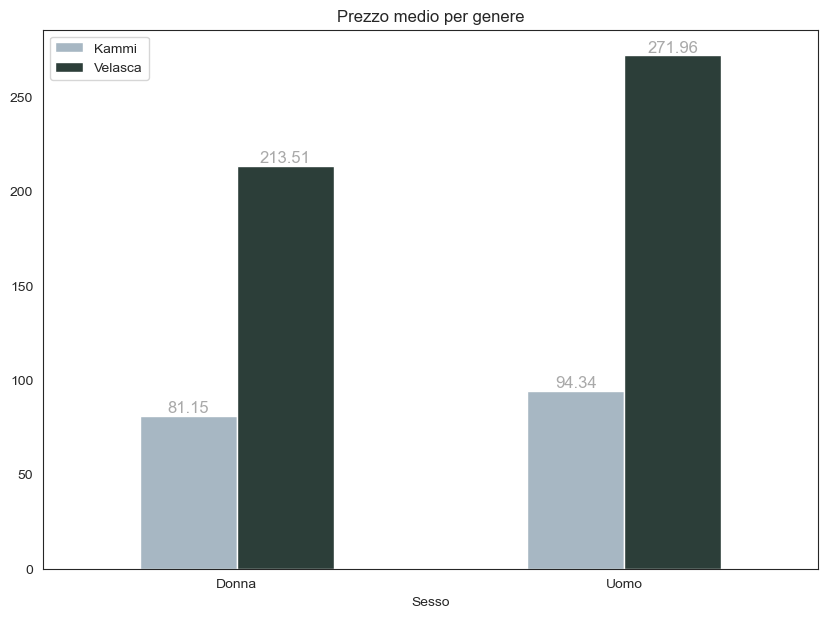

In [55]:
# creo un grafico per comparare il prezzo medio per genere di prezzo_medio_gen_kammi e prezzo_medio_gen_velasca
df_prezzo_gen = pd.DataFrame({'Kammi': prezzo_medio_gen_kammi, 'Velasca': prezzo_medio_gen_velasca})

display(df_prezzo_gen)

sns.set_style('white')
colour_palette = ['#A7B7C3', '#2C3E39']
df_prezzo_gen.plot(kind='bar', figsize=(10, 7), color=colour_palette)
plt.title('Prezzo medio per genere')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()

In [56]:
# raggruppo il df_velasca_copy per genere e calcolo la media del margine
margine_medio_gen_velasca = df_velasca_copy.groupby('Sesso')['Margine'].mean().round(2)

margine_medio_gen_velasca

Sesso
Donna    51.24
Uomo     65.27
Name: Margine, dtype: float64

In [57]:
# raggruppo il df_kammi_copy per genere e calcolo la media del margine
margine_medio_gen_kammi = df_kammi_copy.groupby('Sesso')['Margine'].mean().round(2)

margine_medio_gen_kammi

Sesso
Donna    23.53
Uomo     27.36
Name: Margine, dtype: float64

,Kammi,Velasca
Sesso,,
Donna,23.53,51.24
Uomo,27.36,65.27


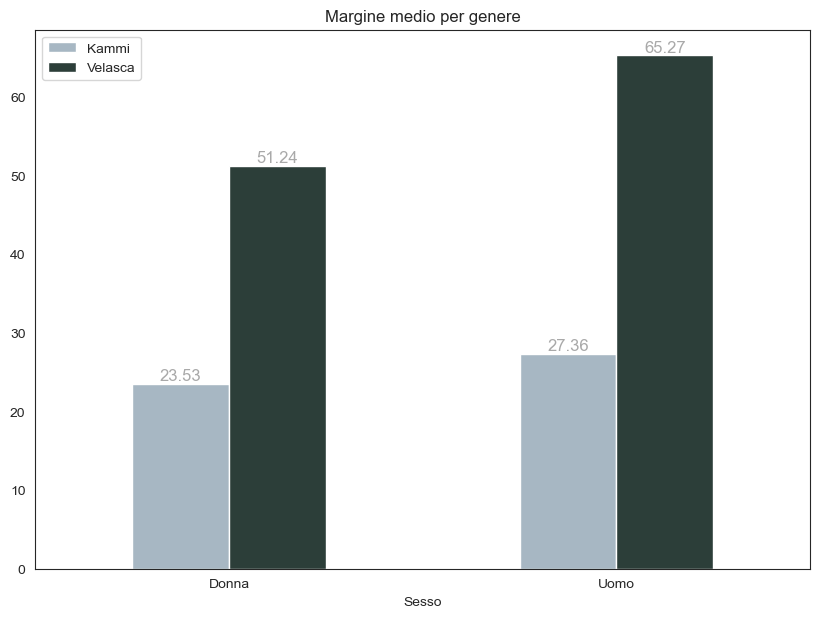

In [58]:
# creo un grafico per comparare il margine medio per genere di prezzo_medio_gen_kammi e prezzo_medio_gen_velasca
df_margine_gen = pd.DataFrame({'Kammi': margine_medio_gen_kammi, 'Velasca': margine_medio_gen_velasca})

display(df_margine_gen)

sns.set_style('white')
colour_palette = ['#A7B7C3', '#2C3E39']
df_margine_gen.plot(kind='bar', figsize=(10, 7), color=colour_palette)
plt.title('Margine medio per genere')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=12, color='darkgrey')
plt.show()